In [137]:
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = (12, 8)

In [138]:
df_07_13 = pd.read_csv("../data/Spreadsheet/2017-07-13.csv")
df_08_03 = pd.read_csv("../data/Spreadsheet/2017-08-03.csv")

In [139]:
df_07_13.head()

,SPAD,NDVI,WP
0,53.10,0.747920,-6.37
1,9.05,0.299633,-10.36
2,72.91,0.805075,-5.38
3,12.00,0.438770,-15.39
4,80.49,0.900775,-5.48


In [140]:
ndvi = df_07_13["NDVI"].as_matrix()
wp = df_07_13["WP"].as_matrix()
ndvi = np.concatenate((ndvi, df_08_03["NDVI"].as_matrix()))
wp = np.concatenate((wp, df_08_03["WP"].as_matrix()))

In [141]:
stats.pearsonr(wp, ndvi)

(0.76446084154427651, 8.7659657162102661e-07)

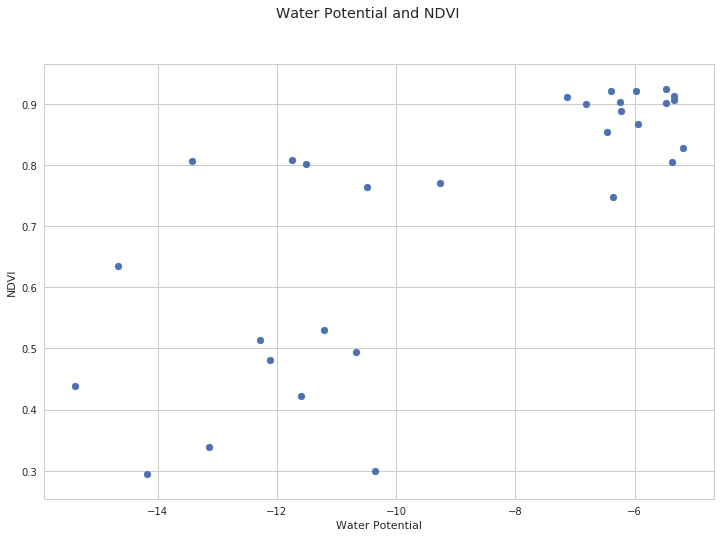

In [142]:
fig = plt.figure()
plt.scatter(wp, ndvi)
fig.suptitle("Water Potential and NDVI")
plt.ylabel("NDVI")
plt.xlabel("Water Potential")

# Linear Regression

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [144]:
def rmse(y, yhat):
    return np.sqrt(np.mean((y - yhat)**2))

In [145]:
X_train, X_valid, y_train, y_valid = train_test_split(ndvi.reshape(-1, 1), wp, test_size=0.15)

In [146]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Training error:", rmse(y_train, model.predict(X_train)))

Training error: 2.21207609202


In [147]:
print("Validation error:", rmse(y_valid, model.predict(X_valid)))

Validation error: 1.74388272579


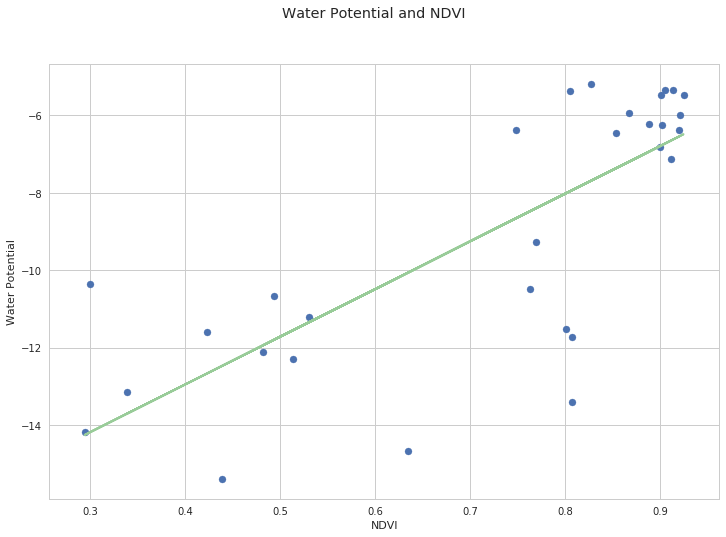

In [148]:
fig = plt.figure()
plt.scatter(ndvi, wp)
plt.plot(ndvi, model.predict(ndvi.reshape(-1, 1)), color="#99CC99", linewidth=2)
fig.suptitle("Water Potential and NDVI")
plt.xlabel("NDVI")
plt.ylabel("Water Potential")

# Polynomial Regression

In [149]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [150]:
model = Pipeline([("poly", PolynomialFeatures(degree=2)), ("linear", LinearRegression(fit_intercept=False))])
model.fit(X_train, y_train)
print("Training error:", rmse(y_train, model.predict(X_train)))

Training error: 2.00718147315


In [151]:
print("Validation error:", rmse(y_valid, model.predict(X_valid)))

Validation error: 1.48157499404


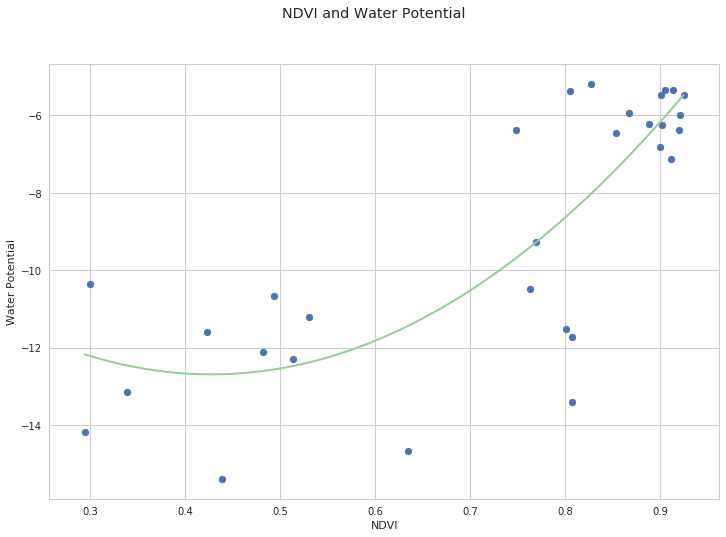

In [152]:
fig = plt.figure()
plt.scatter(ndvi, wp)
datax_os = np.linspace(np.max(ndvi), np.min(ndvi), 1024)
plt.plot(datax_os, model.predict(datax_os.reshape(-1,1)), color="#99CC99", linewidth=2) # 'smoother' line
fig.suptitle("NDVI and Water Potential")
plt.xlabel("NDVI")
plt.ylabel("Water Potential")

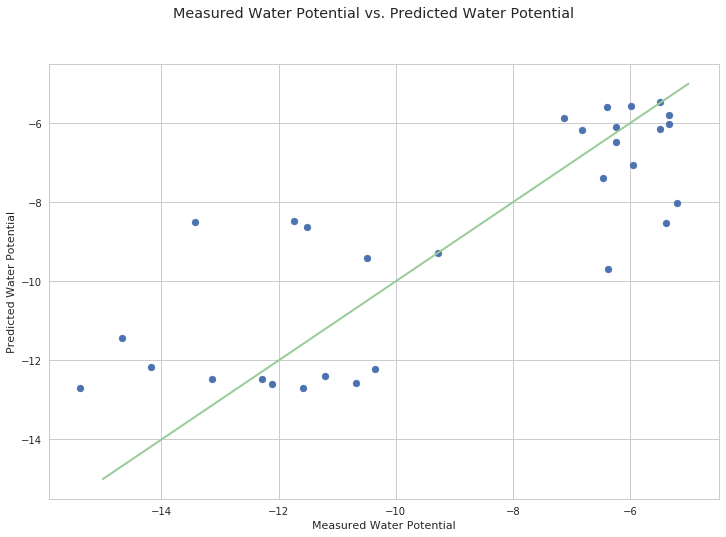

In [157]:
fig = plt.figure()
plt.scatter(wp, model.predict(ndvi.reshape(-1, 1)))
plt.plot(range(-15, -4), range(-15, -4), color="#99CC99", linewidth=2)
fig.suptitle("Measured Water Potential vs. Predicted Water Potential")
plt.xlabel("Measured Water Potential")
plt.ylabel("Predicted Water Potential")